p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PA-MII vs. PA-2C: Mann-Whitney-Wilcoxon test two-sided, P_val:2.984e-50 U_stat=8.183e+04
PA-2C vs. PA-4C: Mann-Whitney-Wilcoxon test two-sided, P_val:8.742e-11 U_stat=1.566e+05
PA-MII vs. PA-4C: Mann-Whitney-Wilcoxon test two-sided, P_val:3.289e-72 U_stat=6.446e+04


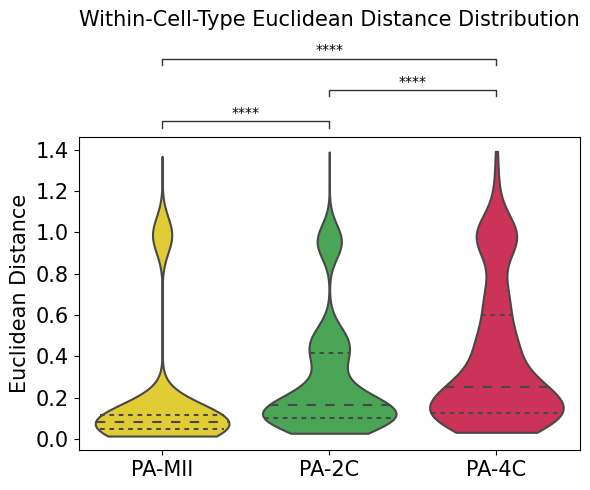

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mannwhitneyu, kruskal
from statannotations.Annotator import Annotator
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 计算欧式距离矩阵
dist_matrix = squareform(pdist(matrix_reduce[:, :ndim], metric='euclidean'))

# 读取细胞类别
label_df = pd.read_csv('/home/lihaoxing/try_scHiCluster/PA_105_cell_type.txt', sep='\t', header=None, index_col=0)
label_df['batch'] = ['_'.join(x.split('_')[:2]) for x in label_df.index]
cell_types = label_df[1].values  # 细胞类型标签
cell_indices = {cell_type: np.where(cell_types == cell_type)[0] for cell_type in np.unique(cell_types)}

# 计算每个类别内的欧式距离
distance_data = []
for cell_type, indices in cell_indices.items():
    if len(indices) > 1:  # 至少两个细胞才计算距离
        intra_distances = pdist(matrix_reduce[indices, :ndim], metric='euclidean')
        for d in intra_distances:
            distance_data.append({"Cell Type": cell_type, "Distance": d})

# 转换为 DataFrame
distance_df = pd.DataFrame(distance_data)

# 自定义颜色
color_map = {
    "PA-MII": "#ffe119",  # 黄色
    "PA-2C": "#3cb44b",   # 绿色
    "PA-4C":  "#e6194b"   # 红色
}

# 创建图形
plt.figure(figsize=(6, 5))
ax = plt.gca()  # 获取当前的 Axes 对象

# 小提琴图
sns.violinplot(
    x="Cell Type", y="Distance", data=distance_df, 
    palette=color_map, order=['PA-MII', 'PA-2C', 'PA-4C'], 
    inner="quart", cut=0, scale="width", ax=ax
)

# 配置统计检验
pairs = [("PA-MII", "PA-2C"), ("PA-MII", "PA-4C"), ("PA-2C", "PA-4C")]
annotator = Annotator(ax, pairs, data=distance_df, x="Cell Type", y="Distance", order=['PA-MII', 'PA-2C', 'PA-4C'])

# 选择统计检验方法
chosen_test = 'Mann-Whitney'  # 你可以动态设置
annotator.configure(test=chosen_test, text_format='star', line_height=0.02, 
                    line_width=1, loc='outside', fontsize=10)
annotator.apply_and_annotate()

# 设置标题和标签
plt.title('Within-Cell-Type Euclidean Distance Distribution', fontsize=15,pad=80)
plt.xlabel('')
plt.ylabel('Euclidean Distance', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

plt.savefig('PA_105_500k_within_distance_violinplot.svg', dpi=300, bbox_inches='tight', transparent=True)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

IVF-ZygoteE vs. IVF-2C: Mann-Whitney-Wilcoxon test two-sided, P_val:1.417e-10 U_stat=2.016e+04
IVF-2C vs. IVF-4C: Mann-Whitney-Wilcoxon test two-sided, P_val:8.170e-34 U_stat=1.202e+05
IVF-ZygoteE vs. IVF-4C: Mann-Whitney-Wilcoxon test two-sided, P_val:2.810e-28 U_stat=1.086e+04


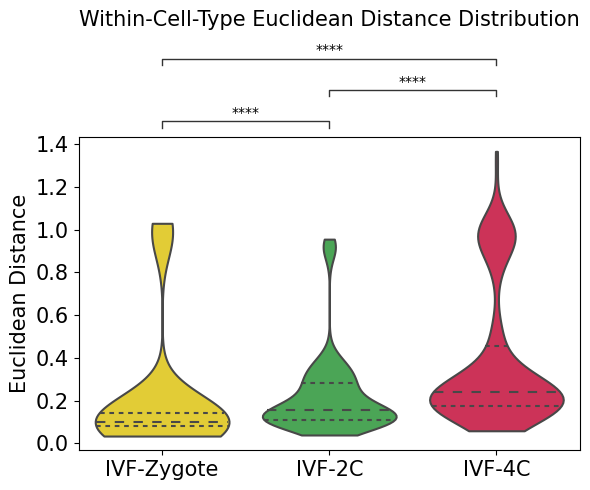

In [89]:
#scHi-C
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mannwhitneyu, kruskal
from statannotations.Annotator import Annotator
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 计算欧式距离矩阵
dist_matrix = squareform(pdist(matrix_reduce[:, :ndim], metric='euclidean'))

# 读取细胞类别
label_df = pd.read_csv('/home/lihaoxing/try_scHiCluster/IVF_103_cell_type.txt', sep='\t', header=None, index_col=0)
label_df['batch'] = ['_'.join(x.split('_')[:2]) for x in label_df.index]
cell_types = label_df[1].values  # 细胞类型标签
cell_indices = {cell_type: np.where(cell_types == cell_type)[0] for cell_type in np.unique(cell_types)}

# 计算每个类别内的欧式距离
distance_data = []
for cell_type, indices in cell_indices.items():
    if len(indices) > 1:  # 至少两个细胞才计算距离
        intra_distances = pdist(matrix_reduce[indices, :ndim], metric='euclidean')
        for d in intra_distances:
            distance_data.append({"Cell Type": cell_type, "Distance": d})

# 转换为 DataFrame
distance_df = pd.DataFrame(distance_data)

# 自定义颜色
color_map = {
    "IVF-ZygoteE": "#ffe119",  # 黄色
    "IVF-2C": "#3cb44b",   # 绿色
    "IVF-4C":  "#e6194b"   # 红色
}

# 创建图形
plt.figure(figsize=(6, 5))
ax = plt.gca()  # 获取当前的 Axes 对象

# 小提琴图
sns.violinplot(
    x="Cell Type", y="Distance", data=distance_df, 
    palette=color_map, order=['IVF-ZygoteE', 'IVF-2C','IVF-4C'], 
    inner="quart", cut=0, scale="width", ax=ax
)

# 配置统计检验
pairs = [("IVF-ZygoteE", "IVF-2C"), ("IVF-2C", "IVF-4C"),("IVF-ZygoteE", "IVF-4C")]
annotator = Annotator(ax, pairs, data=distance_df, x="Cell Type", y="Distance", order=['IVF-ZygoteE','IVF-2C','IVF-4C'])

# 选择统计检验方法
chosen_test = 'Mann-Whitney'  # 你可以动态设置
annotator.configure(test=chosen_test, text_format='star', line_height=0.02, 
                    line_width=1, loc='outside', fontsize=10)
annotator.apply_and_annotate()

# 设置标题和标签
plt.title('Within-Cell-Type Euclidean Distance Distribution', fontsize=15,pad=80)
plt.xlabel('')
plt.ylabel('Euclidean Distance', fontsize=15)

# 修改横坐标标签
plt.xticks(ticks=[0, 1, 2], labels=['IVF-Zygote', 'IVF-2C', 'IVF-4C'], fontsize=15)

plt.yticks(fontsize=15)
plt.tight_layout()

# 保存图像

plt.savefig('IVF_103_500k_within_distance_violinplot.svg', dpi=300, bbox_inches='tight', transparent=True)
